# `Промышленное машинное обучение на Spark`
## `Задание 03: Spark ML`

<span style="color:red">Дедлайн: 4 декабря 2023. 00:00</span>

<span style="color:red">Заполненный ноутбук присылать на почту <b>ekolmagorov98@yandex.ru</b> с темой письма <b>[HSE Spark 2023][Задание 03][ФИО]</b>.</span>

<span style="color:red">Ваша задача повторить содержимое ноутбука `[Pandas] Task 03.ipynb` с использованием `Spark`. Нумерация ячеек между ноутбуками совпадает. Учитывайте эту нумерацию при выполнении задания. Повторять в точности вывод ячеек в данном ноутбуке не требуется. Вывод приведён только в качестве примера выполнения задания.</span>

<span style="color:red"><b>Использование библиотек `pandas` и `sklearn` запрещено. Переносить Spark DataFrame с датасетом на драйвер запрещено.</b></span>

## `Подключение необходимых библиотек`

In [1]:
! pip install pyspark pyarrow

zsh:1: command not found: pip


In [2]:
import os
from collections import defaultdict

import tqdm.notebook as tqdm

import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import matplotlib_inline
import matplotlib.pyplot as plt

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
%matplotlib inline

In [4]:
import pyspark
import pyspark.sql.types as T
import pyspark.sql.functions as F
from pyspark.sql.window import Window

import pyspark_dist_explore

from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext

conf = (
    SparkConf()
        .set('spark.ui.port', '4050')
        .set('spark.driver.memory', '6g')
        .setMaster('local[*]')
)
sc = SparkContext(conf=conf)
spark = SparkSession(sc)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/02/27 06:13:30 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## `Загрузка и считывание данных`

Скачаем и распакуем данные из соревнования [Mobile Price Classification](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification).

In [5]:
path = './mobile-price-classification'

import json
import os
import requests
import wget
import urllib.request
import zipfile


folder_url = 'https://disk.yandex.ru/d/Zmrxvz_g8ZyOpQ'
file_url = '/mobile_price.zip'

# запрос ссылки на скачивание
response = requests.get('https://cloud-api.yandex.net/v1/disk/public/resources/download',
                 params={'public_key': folder_url, 'path': file_url}) 

# 'парсинг' ссылки на скачивание
data_link = response.json()['href'] 	

archive_filename = "mobile_price.zip"
urllib.request.urlretrieve(data_link, archive_filename)


with zipfile.ZipFile(archive_filename, 'r') as zip_ref:
    zip_ref.extractall(path)

os.remove(archive_filename)

100%|███████████████████████████████████████| 70.6k/70.6k [00:00<00:00, 526kB/s]
100%|███████████████████████████████████████| 70.6k/70.6k [00:00<00:00, 524kB/s]
Archive:  mobile-price-classification.zip
  inflating: ./mobile-price-classification/test.csv  
  inflating: ./mobile-price-classification/train.csv  


In [6]:
# 01
# YOUR CODE HERE:
...

In [7]:
# 02
# YOUR CODE HERE:
...

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [8]:
# 03
# YOUR CODE HERE:
...

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
5,6,1464,1,2.9,1,5,1,50,0.8,198,...,9,569,939,3506,10,7,3,1,1,1
6,7,1718,0,2.4,0,1,0,47,1.0,156,...,3,1283,1374,3873,14,2,10,0,0,0
7,8,833,0,2.4,1,0,0,62,0.8,111,...,2,1312,1880,1495,7,2,18,0,1,1
8,9,1111,1,2.9,1,9,1,25,0.6,101,...,19,556,876,3485,11,9,10,1,1,0
9,10,1520,0,0.5,0,1,0,25,0.5,171,...,20,52,1009,651,6,0,5,1,0,1


In [9]:
# 04
# YOUR CODE HERE:
...

root
 |-- battery_power: integer (nullable = true)
 |-- blue: integer (nullable = true)
 |-- clock_speed: double (nullable = true)
 |-- dual_sim: integer (nullable = true)
 |-- fc: integer (nullable = true)
 |-- four_g: integer (nullable = true)
 |-- int_memory: integer (nullable = true)
 |-- m_dep: double (nullable = true)
 |-- mobile_wt: integer (nullable = true)
 |-- n_cores: integer (nullable = true)
 |-- pc: integer (nullable = true)
 |-- px_height: integer (nullable = true)
 |-- px_width: integer (nullable = true)
 |-- ram: integer (nullable = true)
 |-- sc_h: integer (nullable = true)
 |-- sc_w: integer (nullable = true)
 |-- talk_time: integer (nullable = true)
 |-- three_g: integer (nullable = true)
 |-- touch_screen: integer (nullable = true)
 |-- wifi: integer (nullable = true)
 |-- price_range: integer (nullable = true)



In [10]:
# 05
# YOUR CODE HERE:
...

,summary,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,count,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
1,mean,1238.5185,0.495,1.5222499999999983,0.5095,4.3095,0.5215,32.0465,0.5017500000000017,140.249,...,645.108,1251.5155,2124.213,12.3065,5.767,11.011,0.7615,0.503,0.507,1.5
2,stddev,439.4182060835313,0.5001000400170073,0.816004208895068,0.5000347661750049,4.341443747983898,0.49966246736236364,18.145714955206856,0.2884155496235117,35.39965489638834,...,443.78081080643824,432.1994469463379,1084.7320436099492,4.213245004356303,4.356397605826408,5.463955197766688,0.426272922318731,0.5001160445626741,0.5000760322381088,1.1183136021064597
3,min,501,0,0.5,0,0,0,2,0.1,80,...,0,500,256,5,0,2,0,0,0,0
4,25%,851,0,0.7,0,1,0,16,0.2,109,...,282,874,1206,9,2,6,1,0,0,0
5,50%,1225,0,1.5,1,3,1,32,0.5,141,...,564,1247,2146,12,5,11,1,1,1,1
6,75%,1615,1,2.2,1,7,1,48,0.8,170,...,947,1633,3064,16,9,16,1,1,1,2
7,max,1998,1,3.0,1,19,1,64,1.0,200,...,1960,1998,3998,19,18,20,1,1,1,3


## `EDA и визуализация`

Метод [`.spy`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.spy.html) может работать с разреженными матрицами. Можно считать, что пропусков мало, поэтому из можно явно передать на драйвер в координатном виде (каждый пропуск определяется парой номер строки, номер столбца). 

Используйте RDD API, чтобы выделить координатное представление пропусков из DataFrame. Затем создайте разреженную матрицу из этих координат и отрисуйте её.

Полезные методы: `zipWithIndex`, `flatMap`.

In [11]:
from scipy.sparse import csr_matrix


[Stage 9:>                                                          (0 + 1) / 1]



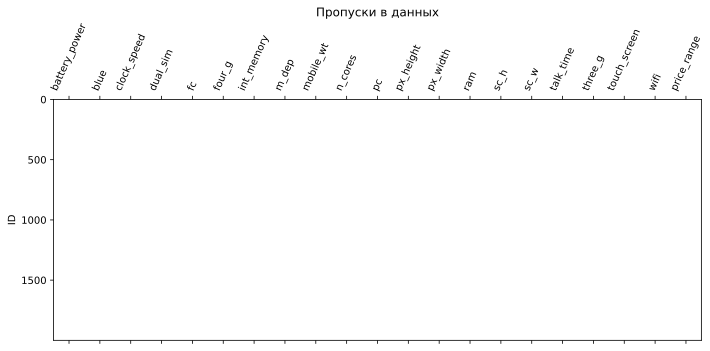

In [12]:
# 06
# YOUR CODE HERE:
...

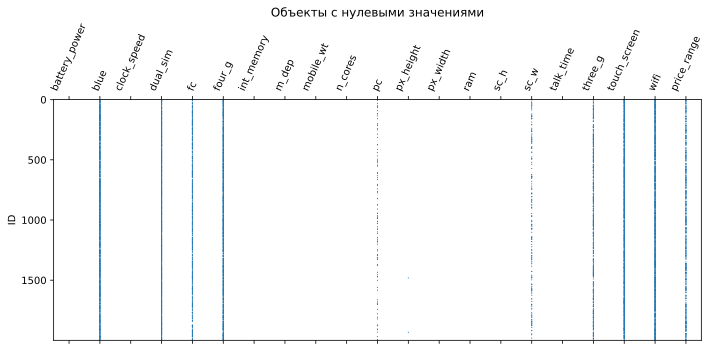

In [13]:
# 07
# YOUR CODE HERE:
...

В ячейке ниже можете использовать `pandas`, чтобы создать DataFrame из посчитанных корреляций.

Полезные модули: `pyspark.ml.stat`, `pyspark.ml.feature`.

In [14]:
# 08
# YOUR CODE HERE:
...

23/02/27 06:13:41 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/02/27 06:13:41 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
23/02/27 06:13:41 WARN InstanceBuilder$JavaBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


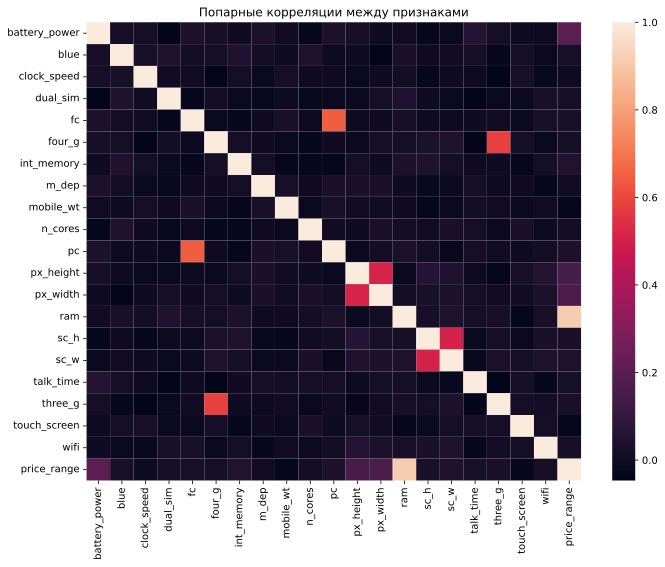

In [15]:
# 09
# YOUR CODE HERE:
...

In [16]:
# 10
# YOUR CODE HERE:
...

,price_range,count
0,1,500
1,3,500
2,2,500
3,0,500


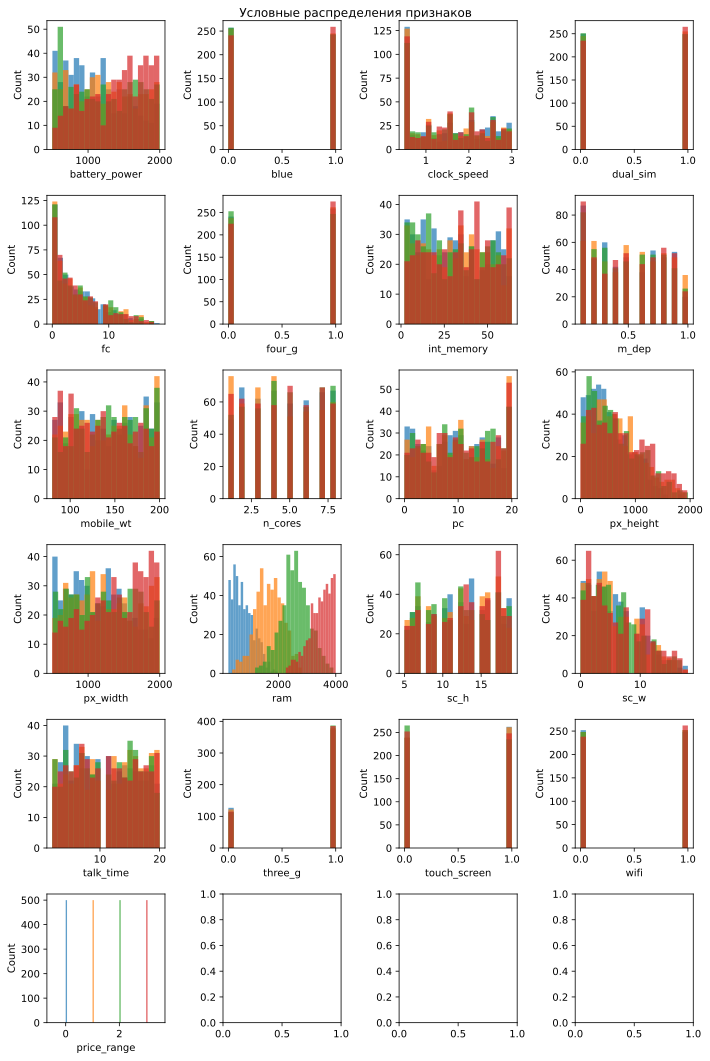

In [17]:
# 11
# YOUR CODE HERE:
...

`boxplot` определяется следующим набором статистик:
 1. Квантили Q1, median, Q3
 2. Нижняя и верхняя граница выборосов (Q1 - 1.5IQR / Q3 + 1.5IQR, но не меньше/больше минимума/максимума выборки)
 3. Выбросы
 
 Чтобы нарисовать `boxplot` по этим статистикам можно использовать метод [`.bxp`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bxp.html).
 
 Реализуйте вспомогательную функцию `draw_boxplot`. Эта функция принимает на вход Spark DataFrame, название колонки для группировки данных `x`, название колонки с данными `y` и оси для отрисовки `ax`. Функция выполняет группировку данных, в каждой группе считает указанные статитстики и затем отрисовывает на их основе набор boxplot.

Диаграмма "Ящик с усами":
```txt
    Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                  |-----:-----|
  o      |--------|     :     |--------|    o  o
                  |-----:-----|
flier             <----------->            fliers
                       IQR
```

In [18]:
def draw_boxplot(df, x, y, ax):
    # YOUR CODE HERE:
    ...
    
    # YOUR CODE HERE:
    boxes = ax.bxp(...)['boxes']
    for box in boxes:
        ax.fill(box.get_xdata(), box.get_ydata())
        
    # YOUR CODE HERE:
    ...

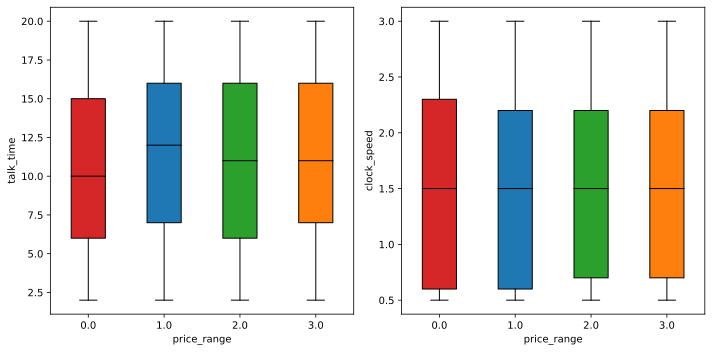

In [19]:
# 12
# YOUR CODE HERE:
...

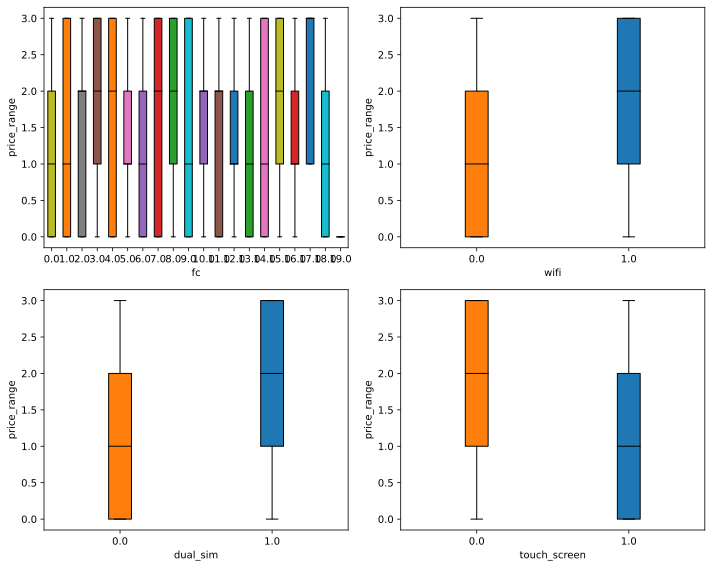

In [20]:
# 13
# YOUR CODE HERE:
...

In [21]:
# 14
# YOUR CODE HERE:
...

(   three_g  count
 0        1   1523
 1        0    477,
    four_g  count
 0       1   1043
 1       0    957)

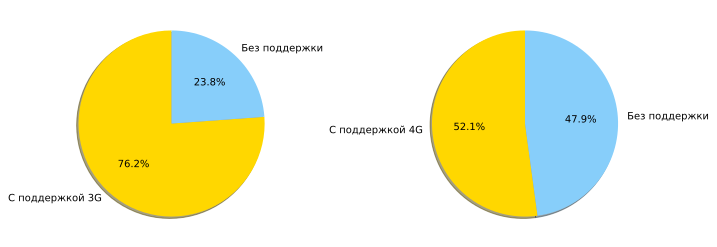

In [22]:
# 15
# YOUR CODE HERE:
...

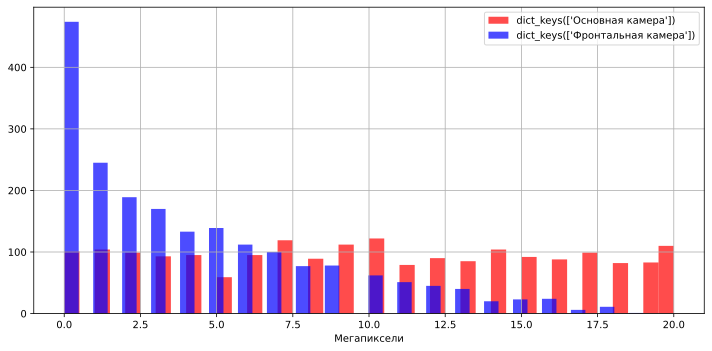

In [23]:
# 16
# YOUR CODE HERE:
...

## `Обучение моделей и оценка качества`

In [24]:
from pyspark.ml import Pipeline

from pyspark.ml.feature import VectorAssembler, StandardScaler

from pyspark.ml.classification import LogisticRegression, RandomForestClassifier

from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [25]:
# 17
# YOUR CODE HERE:
...

In [26]:
# 18
# YOUR CODE HERE:
...

23/02/27 06:14:06 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [27]:
# 19
# YOUR CODE HERE:
...

Можете использовать [MulticlassMetrics](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.mllib.evaluation.MulticlassMetrics.html) для подсчёта метрик через RDD API.

In [28]:
# 20
# YOUR CODE HERE:
...

/usr/local/lib/python3.10/site-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Accuracy (Train/Test): 100.0%/96.8%

Confusion Matrix
[[163.   4.   0.   0.]
 [  2. 126.   3.   0.]
 [  0.   4. 146.   6.]
 [  0.   0.   0. 140.]]

Classification Report
   precision    recall  f1-score  support
0   0.987879  0.976048  0.981928    131.0
1   0.940299  0.961832  0.950943    140.0
2   0.979866  0.935897  0.957377    156.0
3   0.958904  1.000000  0.979021    167.0


In [30]:
# 21
# YOUR CODE HERE:
...

23/02/27 06:15:32 WARN DAGScheduler: Broadcasting large task binary with size 1080.5 KiB
23/02/27 06:15:33 WARN DAGScheduler: Broadcasting large task binary with size 1112.5 KiB
23/02/27 06:15:33 WARN DAGScheduler: Broadcasting large task binary with size 1380.1 KiB
23/02/27 06:15:34 WARN DAGScheduler: Broadcasting large task binary with size 1410.1 KiB
23/02/27 06:15:34 WARN DAGScheduler: Broadcasting large task binary with size 1483.1 KiB
23/02/27 06:15:37 WARN DAGScheduler: Broadcasting large task binary with size 1231.2 KiB
23/02/27 06:15:39 WARN DAGScheduler: Broadcasting large task binary with size 1471.9 KiB
23/02/27 06:15:39 WARN DAGScheduler: Broadcasting large task binary with size 2.0 MiB
23/02/27 06:15:39 WARN DAGScheduler: Broadcasting large task binary with size 2.7 MiB
23/02/27 06:15:40 WARN DAGScheduler: Broadcasting large task binary with size 2.3 MiB
23/02/27 06:15:43 WARN DAGScheduler: Broadcasting large task binary with size 1034.9 KiB
23/02/27 06:15:43 WARN DAGSche

CrossValidatorModel_557537282b29

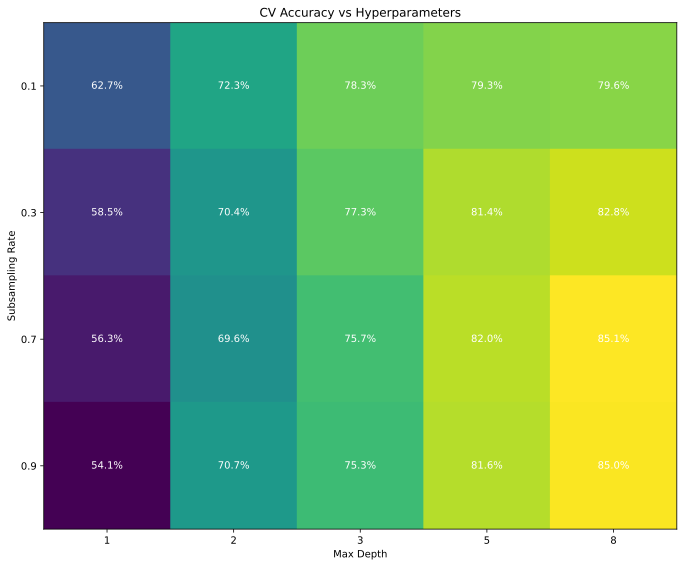

In [31]:
# 22
# YOUR CODE HERE:
...

In [32]:
# 23
# YOUR CODE HERE:
...

/usr/local/lib/python3.10/site-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


23/02/27 06:16:47 WARN DAGScheduler: Broadcasting large task binary with size 3.6 MiB
23/02/27 06:16:48 WARN DAGScheduler: Broadcasting large task binary with size 3.6 MiB
23/02/27 06:16:48 WARN DAGScheduler: Broadcasting large task binary with size 3.6 MiB
23/02/27 06:16:48 WARN DAGScheduler: Broadcasting large task binary with size 3.6 MiB
Accuracy (Train/Test): 98.5%/86.0%

Confusion Matrix
[[156.  11.   0.   0.]
 [  3. 118.  10.   0.]
 [  0.  26. 109.  21.]
 [  0.   0.  12. 128.]]

Classification Report
   precision    recall  f1-score  support
0   0.981132  0.934132  0.957055    131.0
1   0.761290  0.900763  0.825175    140.0
2   0.832061  0.698718  0.759582    156.0
3   0.859060  0.914286  0.885813    167.0
